In [2]:
%pip install pydeseq2

Note: you may need to restart the kernel to use updated packages.


In [3]:
import scanpy as sc
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats

In [4]:
SEACell_ad = sc.read('G:/Data processing pipeline 0.1 Yohan/scRNA/Output/ad_seacell_wlabels/ad_seacell_wlabels.h5ad')

In [5]:
SEACell_ad

AnnData object with n_obs × n_vars = 320 × 13893
    obs: 'Purity', 'Cell_type', 'Compactness', 'separation', 'sample', 'dpi', 'Id'
    layers: 'raw'

In [8]:
SEACell_ad.X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3595367 stored elements and shape (320, 13893)>

In [9]:
print(SEACell_ad.X[:5, :5].toarray())

[[49.  5. 10.  2. 70.]
 [41.  6. 14.  3. 75.]
 [17.  0. 10.  0. 26.]
 [48.  7. 38.  0. 94.]
 [50.  5.  9.  0. 65.]]


# DESeq 

In [10]:
SEACell_ad.obs

,Purity,Cell_type,Compactness,separation,sample,dpi,Id
SEACell-66_Inf_J3,0.725610,Superbasal,0.000028,0.003656,Inf,J3,Inf_J3
SEACell-28_Inf_J3,0.699187,Club cells,0.000029,0.004791,Inf,J3,Inf_J3
SEACell-31_Inf_J3,0.608696,Superbasal,0.010393,0.063823,Inf,J3,Inf_J3
SEACell-38_Inf_J3,0.658683,Superbasal,0.000770,0.010183,Inf,J3,Inf_J3
SEACell-3_Inf_J3,0.899441,Goblet cells,0.000093,0.005436,Inf,J3,Inf_J3
...,...,...,...,...,...,...,...
SEACell-2_Mock_J6,0.631579,Undetermined serous cells,0.000076,0.020001,Mock,J6,Mock_J6
SEACell-61_Mock_J6,1.000000,Basal cells,0.003590,0.041939,Mock,J6,Mock_J6
SEACell-69_Mock_J6,1.000000,Basal cells,0.009930,0.045673,Mock,J6,Mock_J6
SEACell-55_Mock_J6,1.000000,Basal cells,0.006964,0.045673,Mock,J6,Mock_J6


In [11]:
SEACell_ad_subset = SEACell_ad[SEACell_ad.obs['Cell_type'] == 'Ciliated cells']

In [12]:
SEACell_ad_subset

View of AnnData object with n_obs × n_vars = 42 × 13893
    obs: 'Purity', 'Cell_type', 'Compactness', 'separation', 'sample', 'dpi', 'Id'
    layers: 'raw'

In [16]:
SEACell_ad_subset.var_names

Index(['NOC2L', 'KLHL17', 'PLEKHN1', 'PERM1', 'HES4', 'ISG15', 'AGRN',
       'RNF223', 'C1orf159', 'TTLL10',
       ...
       'MT-ND4L', 'MT-ND4', 'MT-ND5', 'MT-ND6', 'MT-CYB', 'EGFP', 'REPLI',
       'GLYCO', 'MEMB', 'NUCL'],
      dtype='object', length=13893)

In [19]:
SEACell_ad_subset.X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 431367 stored elements and shape (42, 13893)>

In [21]:
counts = pd.DataFrame(SEACell_ad_subset.X.toarray(), columns = SEACell_ad_subset.var_names)

In [26]:
dds = DeseqDataSet(
    counts = counts,
    metadata=SEACell_ad_subset.obs,
    design_factors="Id")

C:\Users\test\AppData\Local\Temp\ipykernel_16300\3074514028.py:1: DeprecationWarning: design_factors is deprecated and will soon be removed.Please consider providing a formulaic formula using the design argumentinstead.
  dds = DeseqDataSet(


In [27]:
dds

AnnData object with n_obs × n_vars = 42 × 13893
    obs: 'Purity', 'Cell_type', 'Compactness', 'separation', 'sample', 'dpi', 'Id'
    obsm: 'design_matrix'

In [28]:
dds.deseq2()

Fitting size factors...
... done in 0.04 seconds.



Using None as control genes, passed at DeseqDataSet initialization


Fitting dispersions...
... done in 2.25 seconds.

Fitting dispersion trend curve...
... done in 0.42 seconds.

Fitting MAP dispersions...
... done in 2.68 seconds.

Fitting LFCs...
... done in 1.84 seconds.

Calculating cook's distance...
... done in 0.05 seconds.

Replacing 7 outlier genes.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting LFCs...
... done in 0.01 seconds.



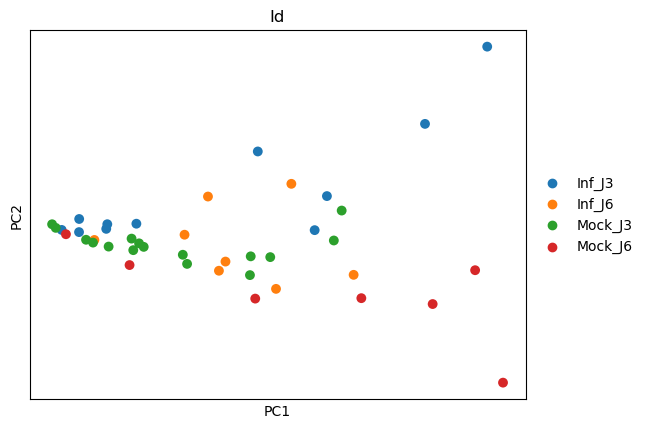

In [29]:
sc.tl.pca(dds)
sc.pl.pca(dds, color = 'Id', size = 200)

In [64]:
stat_res = DeseqStats(dds, contrast=('Id', 'Inf_J3', 'Mock_J3'))

stat_res.summary()

Running Wald tests...


Log2 fold change & Wald test p-value: Id Inf_J3 vs Mock_J3
         baseMean  log2FoldChange     lfcSE      stat    pvalue    padj
NOC2L    5.617012        0.086257  0.288081  0.299420  0.764620  0.9985
KLHL17   0.618564        0.997643  0.852229  1.170628  0.241748     NaN
PLEKHN1  1.371667        0.644891  0.864234  0.746200  0.455546  0.9985
PERM1    0.068871        0.100959  3.904407  0.025858  0.979371     NaN
HES4     1.990828        0.257123  0.553972  0.464145  0.642544  0.9985
...           ...             ...       ...       ...       ...     ...
EGFP     0.282967        1.384227  3.829268  0.361486  0.717736     NaN
REPLI    0.334315        1.686995  3.305772  0.510318  0.609829     NaN
GLYCO    0.234295        1.740175  3.817312  0.455864  0.648488     NaN
MEMB     0.356199        2.521658  1.976061  1.276103  0.201919     NaN
NUCL     0.658253        3.296433  1.377625  2.392838  0.016719     NaN

[13893 rows x 6 columns]


... done in 19.08 seconds.



In [65]:
diff_expr  = stat_res.results_df

In [66]:
diff_expr

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
NOC2L,5.617012,0.086257,0.288081,0.299420,0.764620,0.9985
KLHL17,0.618564,0.997643,0.852229,1.170628,0.241748,NaN
PLEKHN1,1.371667,0.644891,0.864234,0.746200,0.455546,0.9985
PERM1,0.068871,0.100959,3.904407,0.025858,0.979371,NaN
HES4,1.990828,0.257123,0.553972,0.464145,0.642544,0.9985
...,...,...,...,...,...,...
EGFP,0.282967,1.384227,3.829268,0.361486,0.717736,NaN
REPLI,0.334315,1.686995,3.305772,0.510318,0.609829,NaN
GLYCO,0.234295,1.740175,3.817312,0.455864,0.648488,NaN
MEMB,0.356199,2.521658,1.976061,1.276103,0.201919,NaN


In [70]:
SEACell_ad.var_names

Index(['NOC2L', 'KLHL17', 'PLEKHN1', 'PERM1', 'HES4', 'ISG15', 'AGRN',
       'RNF223', 'C1orf159', 'TTLL10',
       ...
       'MT-ND4L', 'MT-ND4', 'MT-ND5', 'MT-ND6', 'MT-CYB', 'EGFP', 'REPLI',
       'GLYCO', 'MEMB', 'NUCL'],
      dtype='object', length=13893)

In [71]:
diff_expr['symbol'] = SEACell_ad.var_names

In [72]:
diff_expr

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,symbol
NOC2L,5.617012,0.086257,0.288081,0.299420,0.764620,0.9985,NOC2L
KLHL17,0.618564,0.997643,0.852229,1.170628,0.241748,NaN,KLHL17
PLEKHN1,1.371667,0.644891,0.864234,0.746200,0.455546,0.9985,PLEKHN1
PERM1,0.068871,0.100959,3.904407,0.025858,0.979371,NaN,PERM1
HES4,1.990828,0.257123,0.553972,0.464145,0.642544,0.9985,HES4
...,...,...,...,...,...,...,...
EGFP,0.282967,1.384227,3.829268,0.361486,0.717736,NaN,EGFP
REPLI,0.334315,1.686995,3.305772,0.510318,0.609829,NaN,REPLI
GLYCO,0.234295,1.740175,3.817312,0.455864,0.648488,NaN,GLYCO
MEMB,0.356199,2.521658,1.976061,1.276103,0.201919,NaN,MEMB


In [52]:
%pip install sanbomics

   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ---------------------------------------- 1.1/1.1 MB 11.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [54]:
from sanbomics.plots import volcano

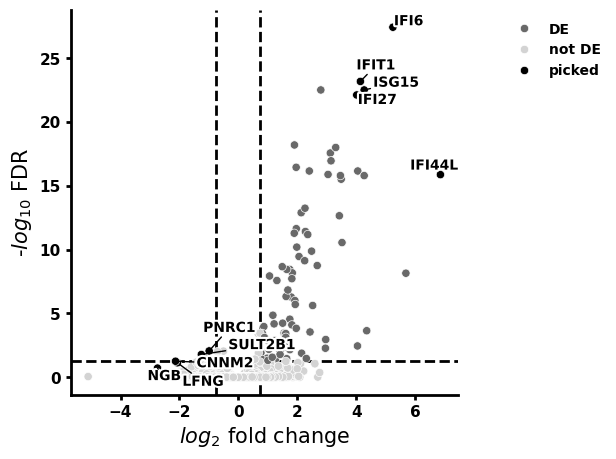

In [73]:
volcano(diff_expr)

In [78]:
SEACell_ad.obs['Cell_type'].unique()

['Superbasal', 'Club cells', 'Goblet cells', 'Ciliated cells', 'Unk3', ..., 'Undetermined serous cells', 'Unk2', 'Ionocytes', 'Deuterosomal', 'Unk1']
Length: 11
Categories (11, object): ['Basal cells', 'Ciliated cells', 'Club cells', 'Deuterosomal', ..., 'Undetermined serous cells', 'Unk1', 'Unk2', 'Unk3']

# All the graphes

In [82]:
cell_type = ['Superbasal', 'Club cells', 'Goblet cells', 'Ciliated cells','Undetermined serous cells', 'Basal cells']

C:\Users\test\AppData\Local\Temp\ipykernel_16300\1385601827.py:7: DeprecationWarning: design_factors is deprecated and will soon be removed.Please consider providing a formulaic formula using the design argumentinstead.
  dds = DeseqDataSet(
Fitting size factors...
... done in 0.03 seconds.



Using None as control genes, passed at DeseqDataSet initialization


Fitting dispersions...
... done in 2.28 seconds.

Fitting dispersion trend curve...
... done in 0.46 seconds.

Fitting MAP dispersions...
... done in 2.80 seconds.

Fitting LFCs...
... done in 1.51 seconds.

Calculating cook's distance...
... done in 0.04 seconds.

Replacing 65 outlier genes.

Fitting dispersions...
... done in 0.03 seconds.

Fitting MAP dispersions...
... done in 0.03 seconds.

Fitting LFCs...
... done in 0.03 seconds.

Running Wald tests...
... done in 1.32 seconds.



Log2 fold change & Wald test p-value: sample Inf vs Mock
          baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
NOC2L    31.471831        0.359553  0.180917  1.987394  0.046879  0.319256
KLHL17    2.588179       -0.190397  0.348537 -0.546275  0.584877  0.867594
PLEKHN1  20.088842        0.170896  0.364821  0.468438  0.639471  0.890774
PERM1     0.059331       -0.128187  3.096594 -0.041396  0.966980       NaN
HES4     46.640275        0.565515  0.146871  3.850434  0.000118  0.007524
...            ...             ...       ...       ...       ...       ...
EGFP      0.495947        2.360540  1.195484  1.974547  0.048320       NaN
REPLI     0.926888        3.208850  1.155676  2.776600  0.005493       NaN
GLYCO     0.739732        2.916351  1.064460  2.739746  0.006149       NaN
MEMB      1.572580        3.968030  0.992473  3.998123  0.000064  0.004723
NUCL      1.454729        3.714877  0.868323  4.278219  0.000019  0.001759

[13893 rows x 6 columns]
None


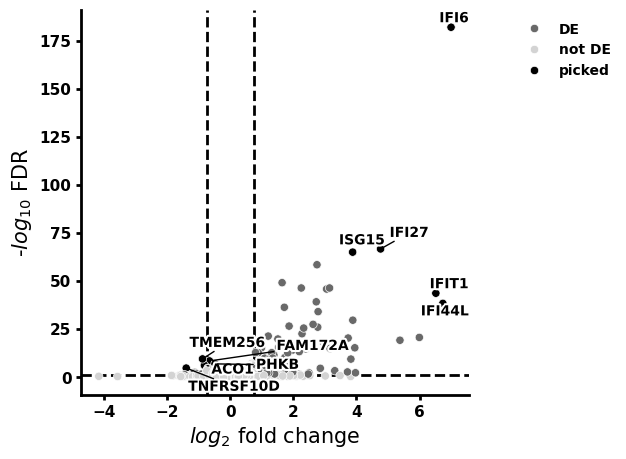

Volcano plot of the cell type: Superbasal and dpi: J3


C:\Users\test\AppData\Local\Temp\ipykernel_16300\1385601827.py:7: DeprecationWarning: design_factors is deprecated and will soon be removed.Please consider providing a formulaic formula using the design argumentinstead.
  dds = DeseqDataSet(
Fitting size factors...
... done in 0.04 seconds.



Using None as control genes, passed at DeseqDataSet initialization


Fitting dispersions...
... done in 2.41 seconds.

Fitting dispersion trend curve...
... done in 0.44 seconds.

Fitting MAP dispersions...
... done in 3.09 seconds.

Fitting LFCs...
... done in 1.53 seconds.

Calculating cook's distance...
... done in 0.05 seconds.

Replacing 162 outlier genes.

Fitting dispersions...
... done in 0.11 seconds.

Fitting MAP dispersions...
... done in 0.08 seconds.

Fitting LFCs...
... done in 0.09 seconds.

Running Wald tests...
... done in 1.07 seconds.



Log2 fold change & Wald test p-value: sample Inf vs Mock
          baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
NOC2L    18.785962        0.153642  0.143202  1.072903  0.283315  0.669033
KLHL17    2.197285        0.500303  0.313204  1.597374  0.110182       NaN
PLEKHN1  13.050760       -0.120418  0.394849 -0.304973  0.760387  0.929691
PERM1     0.087781       -0.240392  1.926207 -0.124801  0.900681       NaN
HES4     28.033269        0.181031  0.162660  1.112940  0.265734  0.653672
...            ...             ...       ...       ...       ...       ...
EGFP      0.074329        0.122075  1.968420  0.062017  0.950549       NaN
REPLI     0.357232        1.569366  1.164579  1.347582  0.177793       NaN
GLYCO     0.263757        1.034477  1.119491  0.924060  0.355455       NaN
MEMB      1.196666        3.134238  0.962407  3.256665  0.001127       NaN
NUCL      0.545601        1.582431  0.757984  2.087684  0.036826       NaN

[13893 rows x 6 columns]
None


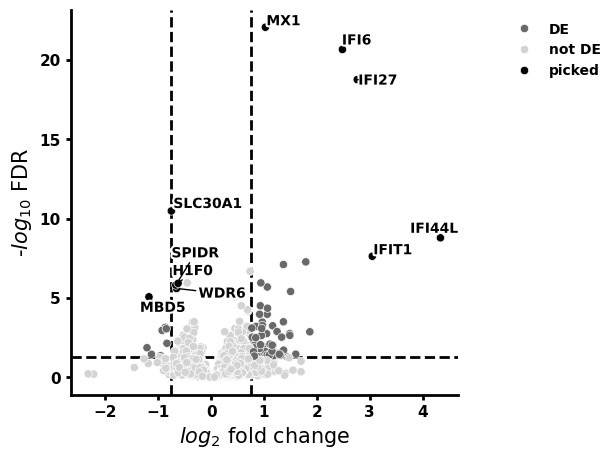

Volcano plot of the cell type: Superbasal and dpi: J6


C:\Users\test\AppData\Local\Temp\ipykernel_16300\1385601827.py:7: DeprecationWarning: design_factors is deprecated and will soon be removed.Please consider providing a formulaic formula using the design argumentinstead.
  dds = DeseqDataSet(
Fitting size factors...
... done in 0.02 seconds.



Using None as control genes, passed at DeseqDataSet initialization


Fitting dispersions...
... done in 2.19 seconds.

Fitting dispersion trend curve...
... done in 0.42 seconds.

Fitting MAP dispersions...
... done in 2.50 seconds.

Fitting LFCs...
... done in 1.44 seconds.

Calculating cook's distance...
... done in 0.03 seconds.

Replacing 3 outlier genes.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting LFCs...
... done in 0.01 seconds.

Running Wald tests...
... done in 1.07 seconds.



Log2 fold change & Wald test p-value: sample Inf vs Mock
          baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
NOC2L    32.098773        0.335051  0.164189  2.040642  0.041286  0.201930
KLHL17    4.728427       -0.024499  0.390215 -0.062784  0.949938  0.980696
PLEKHN1   7.629697        0.646096  0.339849  1.901126  0.057286  0.244260
PERM1     0.666098        1.083803  1.191656  0.909494  0.363090       NaN
HES4     69.223128        0.275003  0.169165  1.625650  0.104024  0.346501
...            ...             ...       ...       ...       ...       ...
EGFP      2.484628        4.090470  1.728029  2.367131  0.017927       NaN
REPLI     4.347759        4.908241  1.481950  3.312014  0.000926  0.013964
GLYCO     4.619911        4.982903  1.658904  3.003733  0.002667  0.030830
MEMB      7.674362        4.735801  1.162621  4.073382  0.000046  0.001288
NUCL      7.207435        5.623184  1.447138  3.885727  0.000102  0.002418

[13893 rows x 6 columns]
None


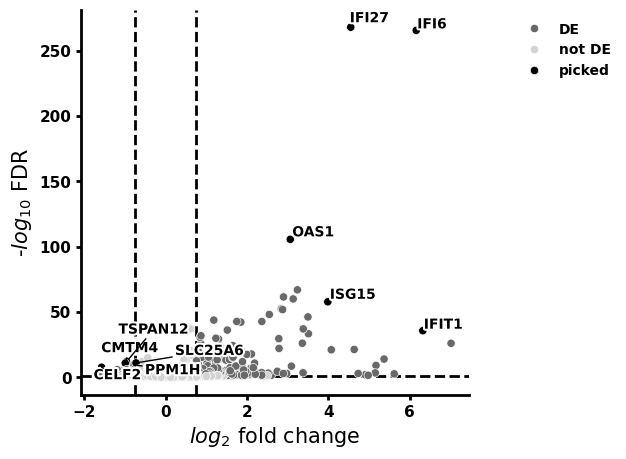

Volcano plot of the cell type: Club cells and dpi: J3


C:\Users\test\AppData\Local\Temp\ipykernel_16300\1385601827.py:7: DeprecationWarning: design_factors is deprecated and will soon be removed.Please consider providing a formulaic formula using the design argumentinstead.
  dds = DeseqDataSet(
Fitting size factors...
... done in 0.01 seconds.



Using None as control genes, passed at DeseqDataSet initialization


Fitting dispersions...
... done in 1.66 seconds.

Fitting dispersion trend curve...
... done in 0.42 seconds.

Fitting MAP dispersions...
... done in 2.03 seconds.

Fitting LFCs...
... done in 1.57 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 1.08 seconds.



Log2 fold change & Wald test p-value: sample Inf vs Mock
          baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
NOC2L    19.303689       -0.103325  0.315740 -0.327247  0.743481       NaN
KLHL17    3.093218        0.341698  0.696788  0.490390  0.623858       NaN
PLEKHN1   3.652541        1.195329  0.623553  1.916963  0.055243       NaN
PERM1     0.410191       -0.977074  2.145747 -0.455354  0.648855       NaN
HES4     32.992170        0.382997  0.292899  1.307608  0.191006  0.999555
...            ...             ...       ...       ...       ...       ...
EGFP      0.200453        1.220358  2.837584  0.430069  0.667145       NaN
REPLI     0.158942        1.199184  3.013872  0.397888  0.690713       NaN
GLYCO     0.296405        1.915801  2.542368  0.753550  0.451120       NaN
MEMB      0.304616        2.041586  2.500347  0.816521  0.414202       NaN
NUCL      0.402523        2.439522  2.073964  1.176261  0.239491       NaN

[13893 rows x 6 columns]
None


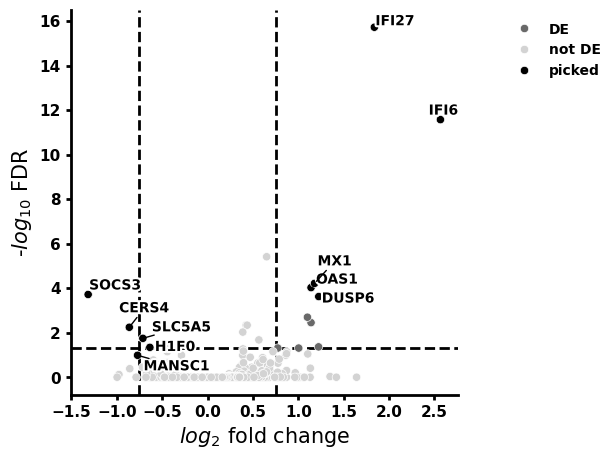

Volcano plot of the cell type: Club cells and dpi: J6


C:\Users\test\AppData\Local\Temp\ipykernel_16300\1385601827.py:7: DeprecationWarning: design_factors is deprecated and will soon be removed.Please consider providing a formulaic formula using the design argumentinstead.
  dds = DeseqDataSet(
Fitting size factors...
... done in 0.02 seconds.



Using None as control genes, passed at DeseqDataSet initialization


Fitting dispersions...
... done in 2.09 seconds.

Fitting dispersion trend curve...
... done in 0.45 seconds.

Fitting MAP dispersions...
... done in 2.57 seconds.

Fitting LFCs...
... done in 1.45 seconds.

Calculating cook's distance...
... done in 0.04 seconds.

Replacing 26 outlier genes.

Fitting dispersions...
... done in 0.02 seconds.

Fitting MAP dispersions...
... done in 0.02 seconds.

Fitting LFCs...
... done in 0.02 seconds.

Running Wald tests...
... done in 1.31 seconds.



Log2 fold change & Wald test p-value: sample Inf vs Mock
          baseMean  log2FoldChange     lfcSE      stat        pvalue  \
NOC2L    22.597108        0.112686  0.156018  0.722259  4.701350e-01   
KLHL17    2.777210        0.219206  0.348070  0.629777  5.288408e-01   
PLEKHN1   5.876341        0.293289  0.275435  1.064823  2.869563e-01   
PERM1     0.565910       -1.356916  0.861167 -1.575671  1.151017e-01   
HES4     46.581609        0.039509  0.180638  0.218721  8.268671e-01   
...            ...             ...       ...       ...           ...   
EGFP      0.985401        3.549156  1.153868  3.075878  2.098840e-03   
REPLI     2.872549        5.082796  1.217500  4.174781  2.982722e-05   
GLYCO     1.322392        3.963676  1.016793  3.898215  9.690450e-05   
MEMB      3.072064        4.961308  0.835653  5.937040  2.902133e-09   
NUCL      3.642140        4.872082  0.864055  5.638627  1.714117e-08   

                 padj  
NOC2L    7.266512e-01  
KLHL17   7.633540e-01  
PLEKHN

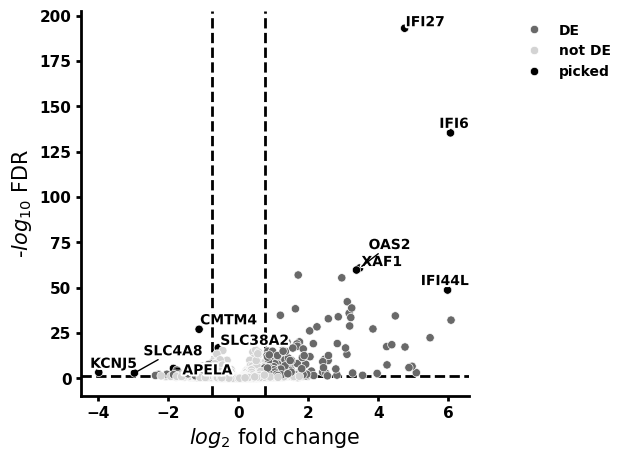

Volcano plot of the cell type: Goblet cells and dpi: J3


C:\Users\test\AppData\Local\Temp\ipykernel_16300\1385601827.py:7: DeprecationWarning: design_factors is deprecated and will soon be removed.Please consider providing a formulaic formula using the design argumentinstead.
  dds = DeseqDataSet(
Fitting size factors...
... done in 0.04 seconds.



Using None as control genes, passed at DeseqDataSet initialization


Fitting dispersions...
... done in 2.15 seconds.

Fitting dispersion trend curve...
... done in 0.43 seconds.

Fitting MAP dispersions...
... done in 2.85 seconds.

Fitting LFCs...
... done in 1.48 seconds.

Calculating cook's distance...
... done in 0.06 seconds.

Replacing 13 outlier genes.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting LFCs...
... done in 0.01 seconds.

Running Wald tests...
... done in 1.14 seconds.



Log2 fold change & Wald test p-value: sample Inf vs Mock
          baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
NOC2L    15.571901        0.010239  0.120101  0.085251  0.932061  0.976430
KLHL17    2.359005        0.016079  0.277127  0.058022  0.953731  0.983930
PLEKHN1   3.477665        0.104748  0.253806  0.412710  0.679819  0.857324
PERM1     0.411462        0.138591  0.711640  0.194748  0.845590       NaN
HES4     26.360387        0.161954  0.132255  1.224559  0.220741  0.508585
...            ...             ...       ...       ...       ...       ...
EGFP      0.454791        1.980528  0.975254  2.030782  0.042277       NaN
REPLI     0.927966        3.186741  1.113980  2.860681  0.004227       NaN
GLYCO     0.309503        1.430245  1.034708  1.382269  0.166889       NaN
MEMB      1.088536        3.438331  1.032732  3.329356  0.000870  0.015855
NUCL      0.673291        2.587426  1.005114  2.574263  0.010045       NaN

[13893 rows x 6 columns]
None


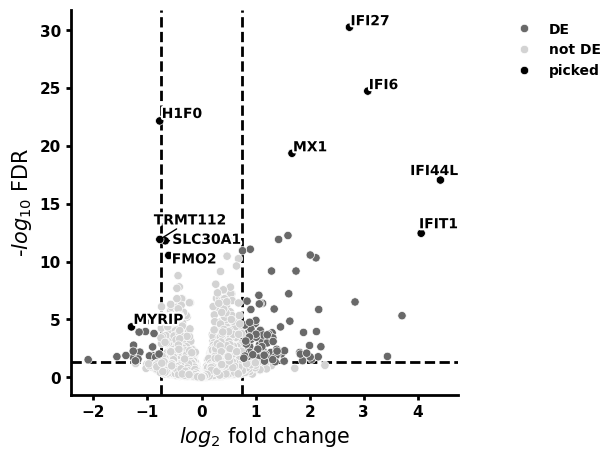

Volcano plot of the cell type: Goblet cells and dpi: J6


C:\Users\test\AppData\Local\Temp\ipykernel_16300\1385601827.py:7: DeprecationWarning: design_factors is deprecated and will soon be removed.Please consider providing a formulaic formula using the design argumentinstead.
  dds = DeseqDataSet(
Fitting size factors...
... done in 0.02 seconds.



Using None as control genes, passed at DeseqDataSet initialization


Fitting dispersions...
... done in 2.20 seconds.

Fitting dispersion trend curve...
... done in 0.41 seconds.

Fitting MAP dispersions...
... done in 2.30 seconds.

Fitting LFCs...
... done in 1.68 seconds.

Calculating cook's distance...
... done in 0.03 seconds.

Replacing 15 outlier genes.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting LFCs...
... done in 0.01 seconds.

Running Wald tests...
... done in 1.07 seconds.



Log2 fold change & Wald test p-value: sample Inf vs Mock
         baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
NOC2L    4.824846        0.092094  0.302445  0.304498  0.760748  0.998515
KLHL17   0.501936        1.016765  0.985212  1.032027  0.302059       NaN
PLEKHN1  1.077153        0.659764  0.895633  0.736645  0.461338  0.998515
PERM1    0.061990        0.101709  3.226453  0.031523  0.974852       NaN
HES4     1.602165        0.235896  0.524295  0.449931  0.652760  0.998515
...           ...             ...       ...       ...       ...       ...
EGFP     0.352052        1.374088  3.138336  0.437840  0.661503       NaN
REPLI    0.380287        1.606372  1.843470  0.871385  0.383544       NaN
GLYCO    0.298864        1.746345  1.831479  0.953516  0.340328       NaN
MEMB     0.454331        2.506045  1.434590  1.746871  0.080660       NaN
NUCL     0.808706        3.267368  1.245165  2.624045  0.008689  0.465076

[13893 rows x 6 columns]
None


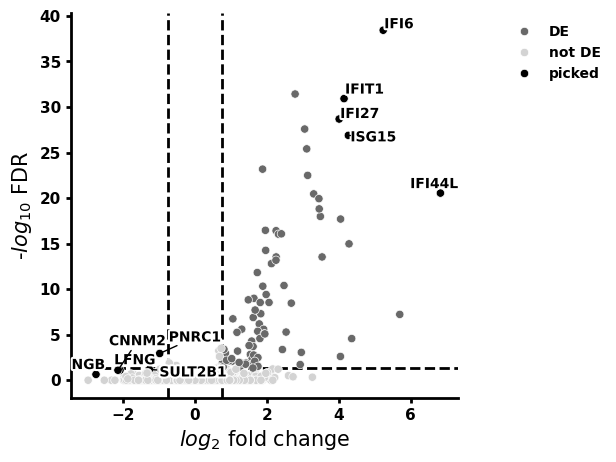

Volcano plot of the cell type: Ciliated cells and dpi: J3


C:\Users\test\AppData\Local\Temp\ipykernel_16300\1385601827.py:7: DeprecationWarning: design_factors is deprecated and will soon be removed.Please consider providing a formulaic formula using the design argumentinstead.
  dds = DeseqDataSet(
Fitting size factors...
... done in 0.01 seconds.



Using None as control genes, passed at DeseqDataSet initialization


Fitting dispersions...
... done in 1.89 seconds.

Fitting dispersion trend curve...
... done in 0.42 seconds.

Fitting MAP dispersions...
... done in 2.12 seconds.

Fitting LFCs...
... done in 1.72 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 7 outlier genes.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting LFCs...
... done in 0.01 seconds.

Running Wald tests...
... done in 1.08 seconds.



Log2 fold change & Wald test p-value: sample Inf vs Mock
         baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
NOC2L    7.301965        0.260885  0.360022  0.724635  0.468676  0.947471
KLHL17   0.904675       -0.437254  0.927612 -0.471376  0.637372       NaN
PLEKHN1  2.149712       -1.659863  0.975337 -1.701834  0.088786       NaN
PERM1    0.081953        0.837431  3.352263  0.249811  0.802734       NaN
HES4     2.958897       -0.609867  0.726537 -0.839416  0.401236       NaN
...           ...             ...       ...       ...       ...       ...
EGFP     0.030128        0.064563  3.340000  0.019330  0.984578       NaN
REPLI    0.146359        1.199471  3.315121  0.361818  0.717488       NaN
GLYCO    0.000000             NaN       NaN       NaN       NaN       NaN
MEMB     0.000000             NaN       NaN       NaN       NaN       NaN
NUCL     0.099312        0.425234  3.292634  0.129147  0.897241       NaN

[13893 rows x 6 columns]
None


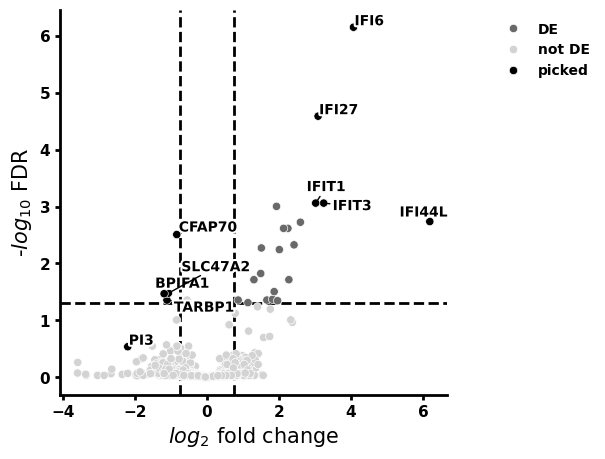

Volcano plot of the cell type: Ciliated cells and dpi: J6


C:\Users\test\AppData\Local\Temp\ipykernel_16300\1385601827.py:7: DeprecationWarning: design_factors is deprecated and will soon be removed.Please consider providing a formulaic formula using the design argumentinstead.
  dds = DeseqDataSet(
Fitting size factors...
... done in 0.01 seconds.



Using None as control genes, passed at DeseqDataSet initialization


Fitting dispersions...
... done in 1.83 seconds.

Fitting dispersion trend curve...
... done in 0.42 seconds.

Fitting MAP dispersions...
... done in 2.14 seconds.

Fitting LFCs...
... done in 1.75 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 1.06 seconds.



Log2 fold change & Wald test p-value: sample Inf vs Mock
          baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
NOC2L    12.717242        0.623100  0.393570  1.583201  0.113376  0.999992
KLHL17    1.352704        0.696715  1.166396  0.597323  0.550292       NaN
PLEKHN1   7.455857        1.423252  0.544510  2.613820  0.008954  0.427018
PERM1     0.216557       -1.367606  3.425724 -0.399217  0.689734       NaN
HES4     22.470818        1.250638  0.471888  2.650283  0.008042  0.402167
...            ...             ...       ...       ...       ...       ...
EGFP     28.011121        7.308527  3.410350  2.143043  0.032110  0.827172
REPLI    37.142474        7.750345  2.572531  3.012731  0.002589  0.202462
GLYCO    35.742429        7.676936  2.917729  2.631134  0.008510  0.417329
MEMB     51.963647        8.213308  3.018199  2.721261  0.006503  0.364187
NUCL     67.303962        8.588749  2.969304  2.892512  0.003822  0.260306

[13893 rows x 6 columns]
None


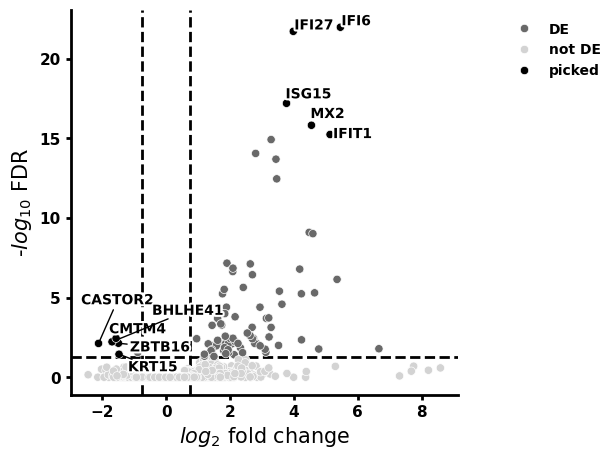

Volcano plot of the cell type: Undetermined serous cells and dpi: J3


C:\Users\test\AppData\Local\Temp\ipykernel_16300\1385601827.py:7: DeprecationWarning: design_factors is deprecated and will soon be removed.Please consider providing a formulaic formula using the design argumentinstead.
  dds = DeseqDataSet(
Fitting size factors...
... done in 0.01 seconds.



Using None as control genes, passed at DeseqDataSet initialization


Fitting dispersions...
... done in 1.77 seconds.

Fitting dispersion trend curve...
... done in 0.40 seconds.

Fitting MAP dispersions...
... done in 2.05 seconds.

Fitting LFCs...
... done in 1.37 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 14 outlier genes.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting LFCs...
... done in 0.01 seconds.

Running Wald tests...
... done in 1.07 seconds.



Log2 fold change & Wald test p-value: sample Inf vs Mock
          baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
NOC2L    10.964267        0.043270  0.373804  0.115757  0.907845  0.997551
KLHL17    2.059424       -0.056904  0.676306 -0.084139  0.932946       NaN
PLEKHN1   6.477778        0.664374  0.503269  1.320117  0.186796  0.964287
PERM1     0.000000             NaN       NaN       NaN       NaN       NaN
HES4     14.333072        0.320398  0.443314  0.722733  0.469844  0.996105
...            ...             ...       ...       ...       ...       ...
EGFP      1.094584        3.350991  3.316839  1.010296  0.312353       NaN
REPLI     1.556342        3.853617  3.309482  1.164417  0.244255       NaN
GLYCO     1.398965        3.043823  3.197942  0.951807  0.341195       NaN
MEMB      1.651125        3.938976  3.308461  1.190577  0.233820       NaN
NUCL      0.570528        2.473672  1.995464  1.239648  0.215106       NaN

[13893 rows x 6 columns]
None


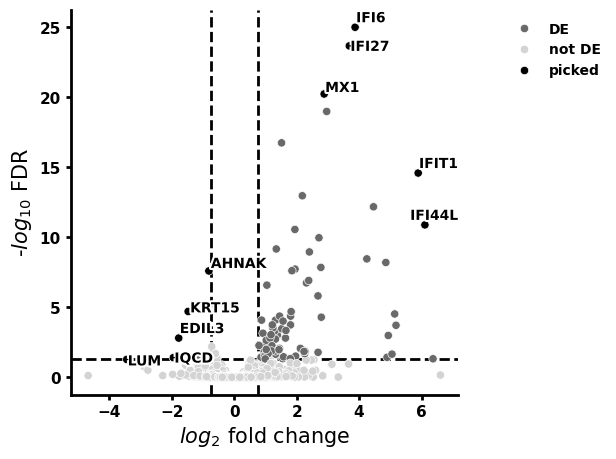

Volcano plot of the cell type: Undetermined serous cells and dpi: J6


C:\Users\test\AppData\Local\Temp\ipykernel_16300\1385601827.py:7: DeprecationWarning: design_factors is deprecated and will soon be removed.Please consider providing a formulaic formula using the design argumentinstead.
  dds = DeseqDataSet(
Fitting size factors...
... done in 0.02 seconds.



Using None as control genes, passed at DeseqDataSet initialization


Fitting dispersions...
... done in 1.87 seconds.

Fitting dispersion trend curve...
... done in 0.42 seconds.

Fitting MAP dispersions...
... done in 2.24 seconds.

Fitting LFCs...
... done in 1.75 seconds.

Calculating cook's distance...
... done in 0.03 seconds.

Replacing 52 outlier genes.

Fitting dispersions...
... done in 0.02 seconds.

Fitting MAP dispersions...
... done in 0.02 seconds.

Fitting LFCs...
... done in 0.02 seconds.

Running Wald tests...
... done in 1.04 seconds.



Log2 fold change & Wald test p-value: sample Inf vs Mock
         baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
NOC2L    9.007731        0.176267  0.266758  0.660774  0.508757  0.999853
KLHL17   0.881200        0.402828  1.093885  0.368254  0.712684  0.999853
PLEKHN1  2.558877        0.207066  0.532302  0.389002  0.697275  0.999853
PERM1    0.000000             NaN       NaN       NaN       NaN       NaN
HES4     2.918699       -0.543177  0.757626 -0.716947  0.473407  0.999853
...           ...             ...       ...       ...       ...       ...
EGFP     0.027590        0.230672  3.230198  0.071411  0.943070       NaN
REPLI    0.082770        0.712815  3.191251  0.223365  0.823251       NaN
GLYCO    0.249097        1.555246  1.891088  0.822408  0.410845       NaN
MEMB     0.237058        1.170123  1.876424  0.623592  0.532896       NaN
NUCL     0.287292        0.601733  1.600938  0.375863  0.707019       NaN

[13893 rows x 6 columns]
None


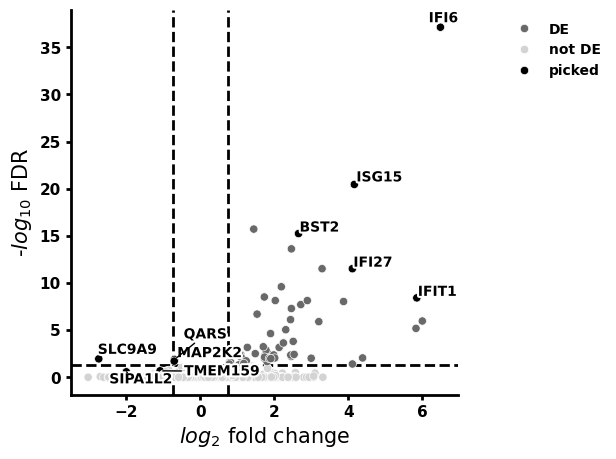

Volcano plot of the cell type: Basal cells and dpi: J3


C:\Users\test\AppData\Local\Temp\ipykernel_16300\1385601827.py:7: DeprecationWarning: design_factors is deprecated and will soon be removed.Please consider providing a formulaic formula using the design argumentinstead.
  dds = DeseqDataSet(
Fitting size factors...
... done in 0.02 seconds.



Using None as control genes, passed at DeseqDataSet initialization


Fitting dispersions...
... done in 1.82 seconds.

Fitting dispersion trend curve...
... done in 0.42 seconds.

Fitting MAP dispersions...
... done in 2.16 seconds.

Fitting LFCs...
... done in 1.61 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 124 outlier genes.

Fitting dispersions...
... done in 0.05 seconds.

Fitting MAP dispersions...
... done in 0.06 seconds.

Fitting LFCs...
... done in 0.07 seconds.

Running Wald tests...
... done in 1.03 seconds.



Log2 fold change & Wald test p-value: sample Inf vs Mock
         baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
NOC2L    3.906552        0.006636  0.515357  0.012877  0.989726  0.999959
KLHL17   0.946376        1.325306  1.085395  1.221036  0.222072  0.999959
PLEKHN1  2.200898        0.211401  0.689062  0.306796  0.758999  0.999959
PERM1    0.000000             NaN       NaN       NaN       NaN       NaN
HES4     2.753855       -0.268670  1.063723 -0.252575  0.800596  0.999959
...           ...             ...       ...       ...       ...       ...
EGFP     0.161941        0.612865  3.109677  0.197083  0.843762  0.999959
REPLI    0.226055        0.749631  2.925168  0.256269  0.797743  0.999959
GLYCO    0.107410        0.255513  3.279623  0.077909  0.937900  0.999959
MEMB     0.966690        3.325720  3.133932  1.061197  0.288600  0.999959
NUCL     0.214820        0.614166  3.245552  0.189233  0.849910  0.999959

[13893 rows x 6 columns]
None


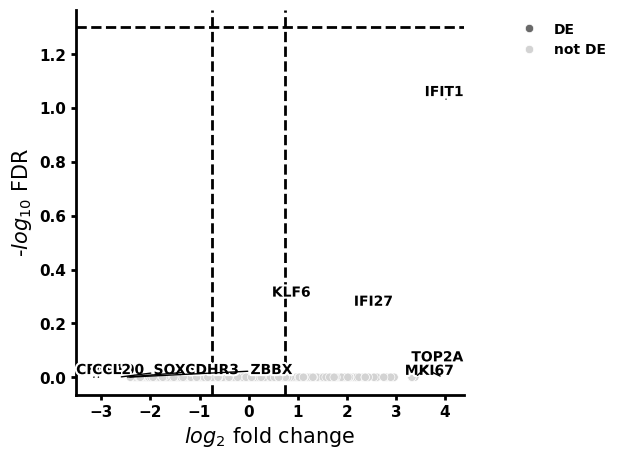

Volcano plot of the cell type: Basal cells and dpi: J6


In [83]:
for _ in cell_type:
    for i in SEACell_ad.obs['dpi'].unique():
        
        SEACell_ad_subset = SEACell_ad[(SEACell_ad.obs['Cell_type'] == _) & (SEACell_ad.obs['dpi'] == i)]
        
        counts = pd.DataFrame(SEACell_ad_subset.X.toarray(), columns = SEACell_ad_subset.var_names)
        dds = DeseqDataSet(
            counts = counts,
            metadata=SEACell_ad_subset.obs,
            design_factors="sample")
        dds.deseq2()
        stat_res = DeseqStats(dds, contrast=('sample', 'Inf', 'Mock'))
        print(stat_res.summary())
        diff_expr  = stat_res.results_df
        diff_expr['symbol'] = SEACell_ad.var_names
        volcano(diff_expr)
        print(f'Volcano plot of the cell type: {_} and dpi: {i}')



In [ ]:
#base for customized volcano plot based on what is necessary

plt.figure(figsize = (6,6))

ax = sns.scatterplot(data = df, x = 'log2FoldChange', y = 'nlog10',
                    hue = 'color', hue_order = ['nobody_cares', 'picked1', 'picked2', 'i_care'],
                    palette = ['lightgrey', 'orange', 'purple', 'grey'],
                    style = 'shape', style_order = ['picked3', 'picked4', 'not_important'],
                    markers = ['^', 's', 'o'], 
                    size = 'baseMean', sizes = (40, 400))

ax.axhline(2, zorder = 0, c = 'k', lw = 2, ls = '--')
ax.axvline(1, zorder = 0, c = 'k', lw = 2, ls = '--')
ax.axvline(-1, zorder = 0, c = 'k', lw = 2, ls = '--')



texts = []
for i in range(len(df)):
    if df.iloc[i].nlog10 > 5 and abs(df.iloc[i].log2FoldChange) > 2:
        texts.append(plt.text(x = df.iloc[i].log2FoldChange, y = df.iloc[i].nlog10, s = df.iloc[i].symbol,
                             fontsize = 12, weight = 'bold'))
        
adjust_text(texts, arrowprops = dict(arrowstyle = '-', color = 'k'))





plt.legend(loc = 1, bbox_to_anchor = (1.4,1), frameon = False, prop = {'weight':'bold'})

for axis in ['bottom', 'left']:
    ax.spines[axis].set_linewidth(2)
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(width = 2)

plt.xticks(size = 12, weight = 'bold')
plt.yticks(size = 12, weight = 'bold')

plt.xlabel("$log_{2}$ fold change", size = 15)
plt.ylabel("-$log_{10}$ FDR", size = 15)

plt.savefig('volcano.png', dpi = 300, bbox_inches = 'tight', facecolor = 'white')

plt.show()

In [33]:
de.sort_values('stat', ascending = False)


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
IFI6,188.569148,5.245403,0.444047,11.812708,3.355775e-32,3.649741e-28
IFIT1,23.809372,4.142389,0.380142,10.896954,1.191809e-27,6.481056e-24
ISG15,32.358044,4.269856,0.399155,10.697242,1.048529e-26,3.023770e-23
MX1,34.807227,2.798320,0.261726,10.691786,1.112089e-26,3.023770e-23
IFI27,146.122742,4.017119,0.379456,10.586522,3.441418e-26,7.485773e-23
...,...,...,...,...,...,...
TMSB15B-1,0.000000,NaN,NaN,NaN,NaN,NaN
TRPC5OS,0.000000,NaN,NaN,NaN,NaN,NaN
GABRQ,0.000000,NaN,NaN,NaN,NaN,NaN
PNMA6A,0.000000,NaN,NaN,NaN,NaN,NaN


In [34]:
res = de[de.baseMean >= 10]

In [35]:
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ISG15,32.358044,4.269856,0.399155,10.697242,1.048529e-26,3.023770e-23
AGRN,20.234148,0.875150,0.279563,3.130416,1.745588e-03,1.385768e-01
TTLL10,36.662745,-0.040801,0.242606,-0.168180,8.664419e-01,9.984997e-01
SDF4,18.245519,-0.114702,0.182627,-0.628064,5.299623e-01,9.984997e-01
INTS11,16.406733,0.086393,0.176654,0.489053,6.248041e-01,9.984997e-01
...,...,...,...,...,...,...
MT-ND3,37.217846,-0.257732,0.288221,-0.894217,3.712059e-01,9.984997e-01
MT-ND4L,15.255727,-0.483900,0.293372,-1.649438,9.905786e-02,9.313474e-01
MT-ND4,24.778676,-0.208107,0.265649,-0.783392,4.333970e-01,9.984997e-01
MT-ND5,15.257061,-0.395507,0.265710,-1.488492,1.366213e-01,9.775610e-01


In [40]:
sigs = res[(res.padj < 0.05) & (abs(res.log2FoldChange) > 0.5)]

In [41]:
sigs

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ISG15,32.358044,4.269856,0.399155,10.697242,1.048529e-26,3.023770e-23
IFI6,188.569148,5.245403,0.444047,11.812708,3.355775e-32,3.649741e-28
IFI44L,12.322661,6.858129,0.759314,9.032009,1.685480e-19,1.309377e-16
IFI44,17.488103,3.044024,0.336602,9.043405,1.518665e-19,1.270539e-16
GBP1,21.341797,1.551748,0.324277,4.785261,1.707651e-06,3.439336e-04
ADAR,36.208119,1.058352,0.160092,6.610898,3.819967e-11,1.154054e-08
IFI16,21.300754,0.864637,0.171916,5.029423,4.919568e-07,1.070104e-04
EIF2AK2,19.030353,1.308187,0.201871,6.480298,9.154149e-11,2.620014e-08
CFAP221,43.727204,-0.504553,0.125994,-4.004572,6.212977e-05,9.009646e-03
STAT1,23.410700,2.132155,0.259710,8.209762,2.216280e-16,1.268645e-13


In [36]:
dds

AnnData object with n_obs × n_vars = 42 × 13893
    obs: 'Purity', 'Cell_type', 'Compactness', 'separation', 'sample', 'dpi', 'Id'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var', 'pca', 'Id_colors'
    obsm: 'design_matrix', 'size_factors', '_mu_LFC', '_hat_diagonals', 'replaceable', 'X_pca'
    varm: '_normed_means', 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'refitted', '_pvalue_cooks_outlier', 'PCs'
    layers: 'normed_counts', '_mu_hat', 'cooks', 'replace_cooks'

In [37]:
dds.layers['normed_counts']

array([[ 0.        ,  1.65957383,  3.31914767, ...,  0.        ,
         0.        ,  0.        ],
       [ 9.10265976,  1.65502905,  0.82751452, ...,  0.41375726,
         0.        ,  0.        ],
       [11.44652374,  0.        ,  2.86163094, ...,  2.86163094,
         2.86163094,  8.58489281],
       ...,
       [ 5.91906641,  1.3659384 ,  1.3659384 , ...,  0.        ,
         0.        ,  0.4553128 ],
       [ 6.12888052,  0.34049336,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 3.35226654,  1.34090662,  8.0454397 , ...,  0.        ,
         0.        ,  0.        ]])

In [38]:
dds.layers['log1p'] = np.log1p(dds.layers['normed_counts'].copy())

In [39]:
dds.layers['log1p']

array([[0.        , 0.9781659 , 1.46305808, ..., 0.        , 0.        ,
        0.        ],
       [2.31279873, 0.9764556 , 0.60295686, ..., 0.34625089, 0.        ,
        0.        ],
       [2.52144137, 0.        , 1.35108962, ..., 1.35108962, 1.35108962,
        2.26018819],
       ...,
       [1.93428085, 0.86117473, 0.86117473, ..., 0.        , 0.        ,
        0.37522086],
       [1.96415421, 0.29303773, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.47069675, 0.8505383 , 2.20226073, ..., 0.        , 0.        ,
        0.        ]])

In [42]:
dds_sigs = dds[:, sigs.index]
dds_sigs

View of AnnData object with n_obs × n_vars = 42 × 57
    obs: 'Purity', 'Cell_type', 'Compactness', 'separation', 'sample', 'dpi', 'Id'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var', 'pca', 'Id_colors'
    obsm: 'design_matrix', 'size_factors', '_mu_LFC', '_hat_diagonals', 'replaceable', 'X_pca'
    varm: '_normed_means', 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'refitted', '_pvalue_cooks_outlier', 'PCs'
    layers: 'normed_counts', '_mu_hat', 'cooks', 'replace_cooks', 'log1p'

In [43]:
grapher = pd.DataFrame(dds_sigs.layers['log1p'].T,
                       index=dds_sigs.var_names, columns=dds_sigs.obs_names)

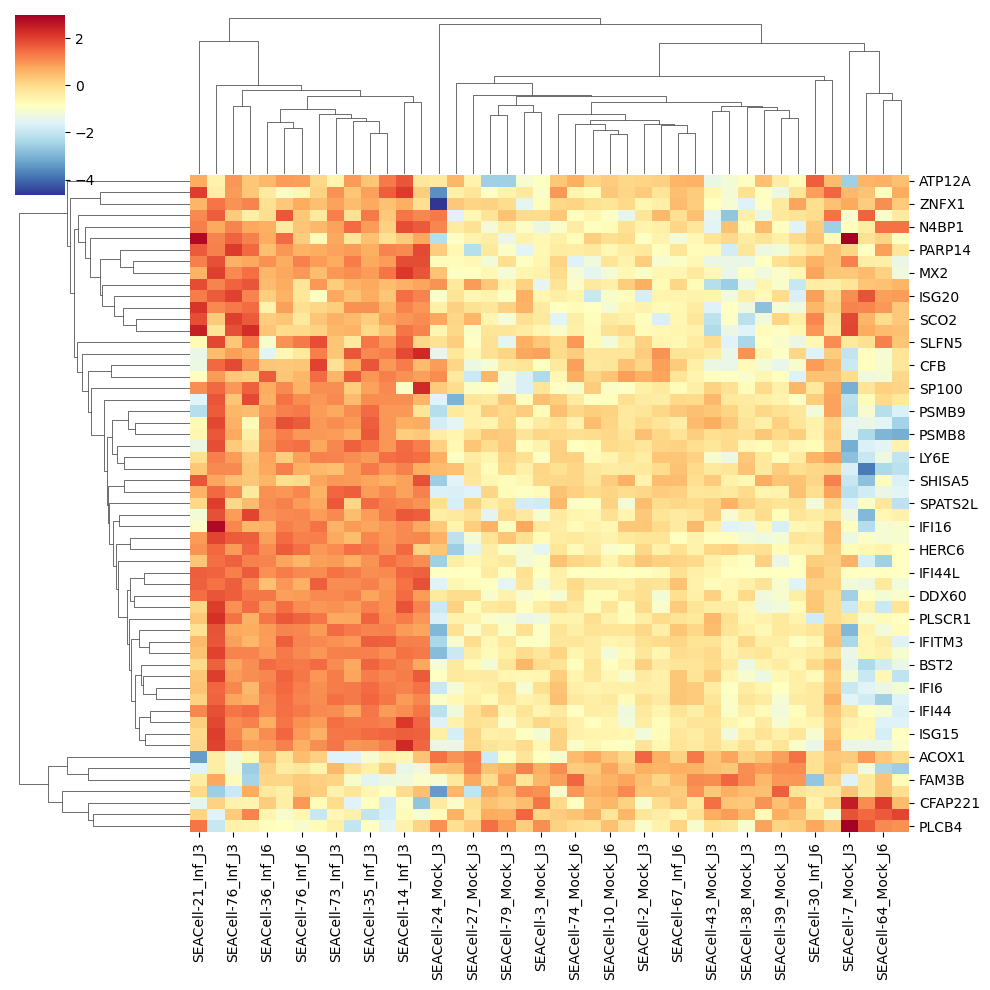

In [44]:
sns.clustermap(grapher, z_score=0, cmap = 'RdYlBu_r')